# Beta VAE with MNIST dataset

Beta-VAE is an extension of vanilla Variational Autoencoder (VAE) with a regularization parameter, beta, controlling the balance between reconstruction fidelity and latent space structure. It promotes disentangled feature learning for interpretable representations. Applications include image synthesis with controlled features, domain adaptation, and representation learning for downstream tasks. Beta-VAE's versatility allows users to customize models for specific trade-offs between reconstruction accuracy and capturing meaningful latent factors, making it useful in various generative and unsupervised learning scenarios.

In [1]:
# Install the library

!pip uninstall rapidae -y

In [2]:
import os
import sys

notebook_dir = os.path.abspath('')
sys.path.append(os.path.join(notebook_dir, '..', 'src'))

from keras import utils
from rapidae.data import plot_reconstructions
from rapidae.data import plot_samplings_from_latent
from rapidae.data import load_MNIST
from rapidae.models import Beta_VAE
from rapidae.models.base import Encoder_Conv_MNIST, Decoder_Conv_MNIST
from rapidae.pipelines import TrainingPipeline

2024-01-30 00:35:49.023341: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-30 00:35:49.023390: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-30 00:35:49.043916: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-30 00:35:49.094611: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-30 00:35:49.817399: W tensorflow/compiler/tf2

### Download and preprocess the dataset

In this example, the selected dataset is the well-known MNIST composed of handwritten digit images.

Train and test data are normalized and labels are converted into one-hot encoding.

In [3]:
# Load MNIST dataset
x_train, y_train, x_test, y_test = load_MNIST()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Obtain number of clasess
n_classes = len(set(y_train))

# Convert labels to categorical
y_train = utils.to_categorical(y_train, n_classes)
y_test = utils.to_categorical(y_test, n_classes)

2024-01-30 00:35:51 [INFO]: Downloading train-images-idx3-ubyte.gz...
2024-01-30 00:35:52 [INFO]: Downloading train-labels-idx1-ubyte.gz...
2024-01-30 00:35:52 [INFO]: Downloading t10k-images-idx3-ubyte.gz...
2024-01-30 00:35:52 [INFO]: Downloading t10k-labels-idx1-ubyte.gz...
2024-01-30 00:35:53 [INFO]: Deleting MNIST data...


### Model creation

In this example we are using a beta variational autoencoder.  
The regularization parameter can be tuned to improve the results.  
The default value of beta is 1.0, so if the model is not modified it will work as a vanilla variational autoencoder.

In [4]:
# Model creation
model = Beta_VAE(input_dim=x_train.shape[1], latent_dim=2, beta=0.5,
            encoder=Encoder_Conv_MNIST, decoder=Decoder_Conv_MNIST, layers_conf=[32, 64])

2024-01-30 00:35:53.536196: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-30 00:35:53.625128: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-30 00:35:53.625307: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

### Training pipeline

Define the training pipeline. There you can fix some hyperparameters related to the training phase of the autoencoder, like learning rate, bath size, numer of epochs, etc.
Here you can define callbacks to the model.
Also the pipeline's name can be customized to facilitate the identification of the corresponding folder with the saved models inside output_dir folder.

In [5]:
pipe = TrainingPipeline(name='training_pipeline_mnist_mlp_vae', learning_rate=0.001,
                        model=model, num_epochs=30, batch_size=128)

trained_model = pipe(x=x_train, y=x_train)

2024-01-30 00:35:53 [INFO]: +++ training_pipeline_mnist_mlp_vae +++
2024-01-30 00:35:53 [INFO]: Creating folder in ./output_dir/training_pipeline_mnist_mlp_vae_2024-01-30_00-35-53


Epoch 1/30


2024-01-30 00:35:55.539203: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fa140012580 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-30 00:35:55.539228: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2024-01-30 00:35:55.597376: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-30 00:35:55.902406: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-01-30 00:35:57.691817: I external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:326] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_791', 148 bytes spill stores, 148 bytes spill loads

2024-01-30 00:35:58.086362: I external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:326] ptxas warning : Registers


Epoch 1: loss improved from inf to 36.20657, saving model to ./output_dir/training_pipeline_mnist_mlp_vae_2024-01-30_00-35-53/model.weights.h5
469/469 - 17s - 35ms/step - kl_loss: 0.7029 - loss: 36.2066 - reconstruction_loss: 35.8551
Epoch 2/30

Epoch 2: loss improved from 36.20657 to 31.85987, saving model to ./output_dir/training_pipeline_mnist_mlp_vae_2024-01-30_00-35-53/model.weights.h5
469/469 - 2s - 3ms/step - kl_loss: 1.5576 - loss: 31.8599 - reconstruction_loss: 31.0810
Epoch 3/30

Epoch 3: loss improved from 31.85987 to 30.37843, saving model to ./output_dir/training_pipeline_mnist_mlp_vae_2024-01-30_00-35-53/model.weights.h5
469/469 - 2s - 3ms/step - kl_loss: 2.5505 - loss: 30.3784 - reconstruction_loss: 29.1032
Epoch 4/30

Epoch 4: loss improved from 30.37843 to 29.03420, saving model to ./output_dir/training_pipeline_mnist_mlp_vae_2024-01-30_00-35-53/model.weights.h5
469/469 - 2s - 3ms/step - kl_loss: 3.4955 - loss: 29.0342 - reconstruction_loss: 27.2865
Epoch 5/30

Epoch 

2024-01-30 00:36:54 [INFO]: Best model restored


### Evaluation step

Once the model is trained we can evaluate the model with the test set, generate a 2D manifold of decoded samples in the latent space and compare the reconstructed images to see the model performance.

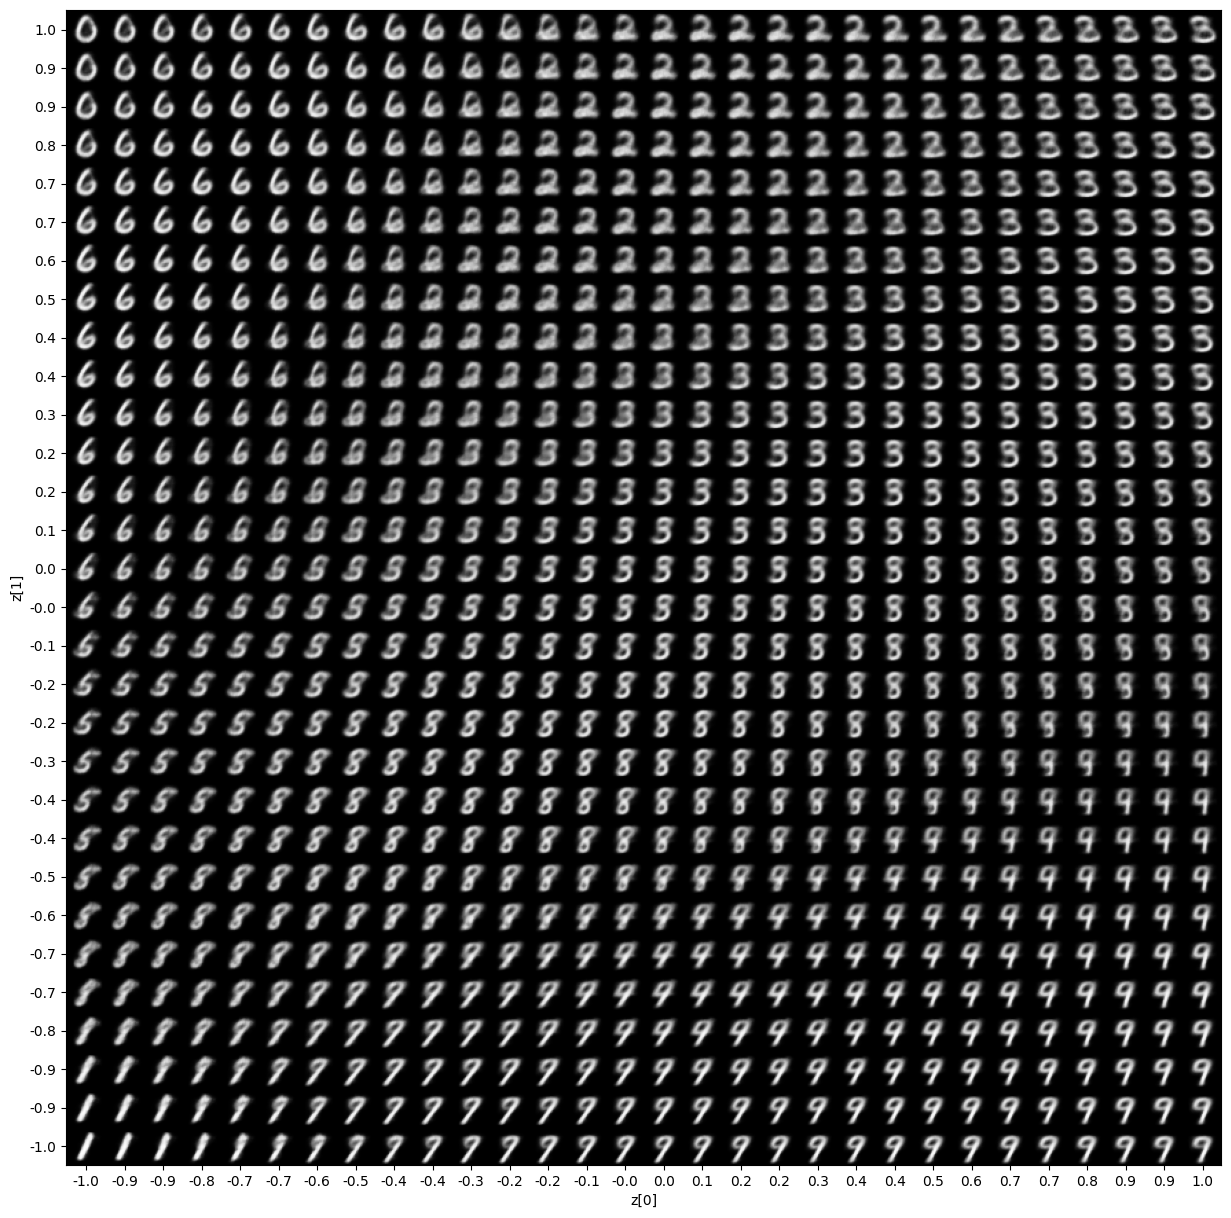

In [6]:
plot_samplings_from_latent(trained_model)

2024-01-30 00:36:59.955674: I external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:326] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_385', 148 bytes spill stores, 148 bytes spill loads



288/313 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step

2024-01-30 00:37:03.412479: I external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:326] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_407', 356 bytes spill stores, 356 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step


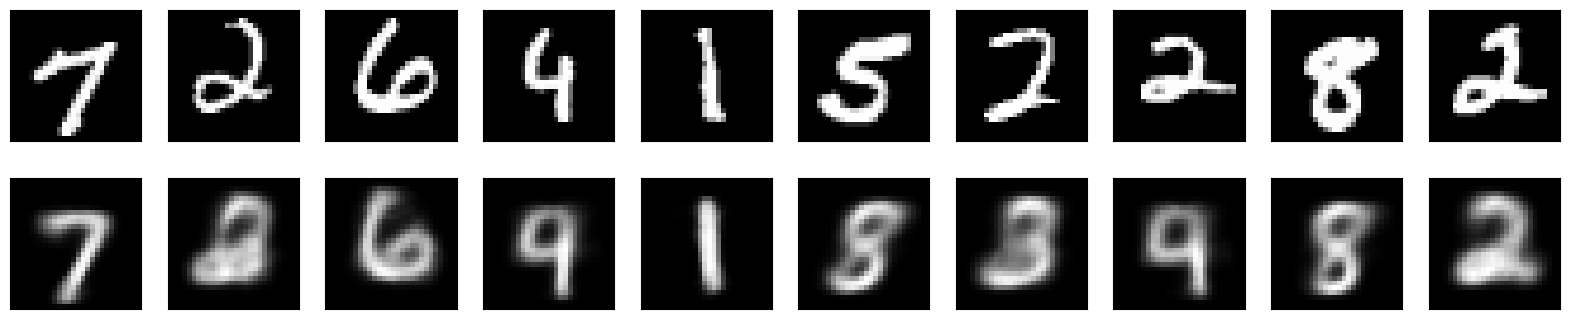

In [7]:
outputs = trained_model.predict(x_test)

plot_reconstructions(x_test, outputs['recon'])